In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
data_set=pd.read_csv("F:\\Downloads\\Calfornia_Housing_Prices.csv")
data_set
data_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


TO SEE INFORMATION IN MY DATA SET

In [3]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


PART OF DATA CLEANING

In [4]:
##fill missing value tatal bedroom with median 
data_set.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
data_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data_set.isnull().sum().sum()

np.int64(207)

YOU SEE THERE IS NULL IN total_bedrooms VARIABLE I CAN CLEAN IT

In [7]:
# Fill missing values in total_bedrooms with median
data_set= data_set.assign(total_bedrooms=data_set['total_bedrooms'].fillna(data_set['total_bedrooms'].median()))
data_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [8]:
data_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

YOU SEE AFTER REMOVE IT ALREADY MY DATA SET CHANGED NO NULL 

MACHINE LEARNING PART

In [9]:
# Define independent variables (features) ME I AM INTRESTED ABOUT TO THIS VARIABLE BUT YOU CAN CHANGE
features =["total_rooms","total_bedrooms","population","households","median_income"]
features

['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [10]:
# Define dependent variable (target)
target = 'median_house_value'
target

'median_house_value'

In [11]:
# Split data into X (features) and y (target)
X = data_set[features]
y =data_set[target]

In [12]:
X

,total_rooms,total_bedrooms,population,households,median_income
0,880,129.0,322,126,8.3252
1,7099,1106.0,2401,1138,8.3014
2,1467,190.0,496,177,7.2574
3,1274,235.0,558,219,5.6431
4,1627,280.0,565,259,3.8462
...,...,...,...,...,...
20635,1665,374.0,845,330,1.5603
20636,697,150.0,356,114,2.5568
20637,2254,485.0,1007,433,1.7000
20638,1860,409.0,741,349,1.8672


In [13]:
y


0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [15]:
## Spliting the Data into Training and Testing Sets
# Split data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,total_rooms,total_bedrooms,population,households,median_income
14196,3126,627.0,2300,623,3.2596
8267,3382,787.0,1314,756,3.8125
17445,1897,331.0,915,336,4.1563
14265,1421,367.0,1418,355,1.9425
2271,2382,431.0,874,380,3.5542
...,...,...,...,...,...
11284,1330,201.0,658,217,6.3700
11964,3084,570.0,1753,449,3.0500
5390,2101,569.0,1756,527,2.9344
860,3575,597.0,1777,559,5.7192


In [17]:
X_test

,total_rooms,total_bedrooms,population,households,median_income
20046,1505,435.0,1392,359,1.6812
3024,2943,435.0,1565,584,2.5313
15663,3830,435.0,1310,963,3.4801
20484,3051,435.0,1705,495,5.7376
9814,2351,435.0,1063,428,3.7250
...,...,...,...,...,...
15362,3165,482.0,1351,452,4.6050
16623,4323,886.0,1650,705,2.7266
18086,4111,538.0,1585,568,9.2298
2144,2507,466.0,1227,474,2.7850


In [18]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

In [19]:
# Initialize scaler
scaler = StandardScaler()

In [20]:
# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
## Make Predictions and Evaluate the Model
# Predict house prices on test data
y_pred2 = model.predict(X_test_scaled)

In [23]:
y_pred2

array([101497.98158998, 135840.0658825 , 228510.38738395, ...,
       429233.67749275, 156131.20358123, 189057.58716483], shape=(4128,))

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [25]:
# Calculate errors
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)

In [28]:
#evaluation of owr modal
# Display results
print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 6368310495.28
Root Mean Squared Error (RMSE): 79801.69
R² Score: 0.5140


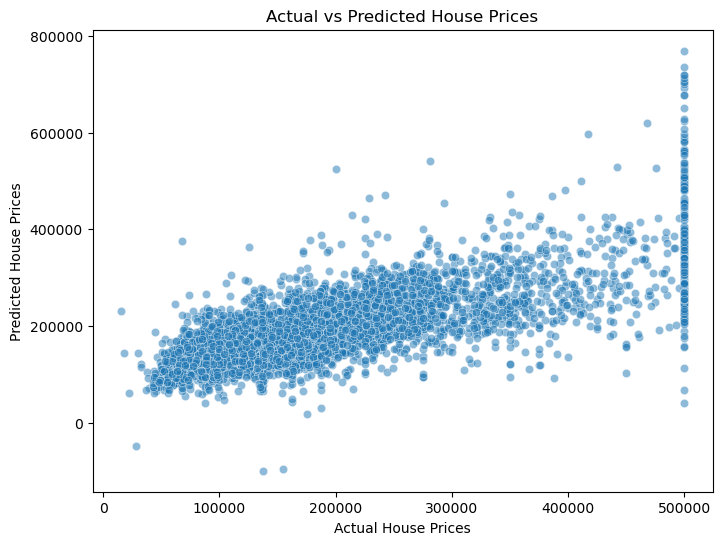

In [29]:
## Visualize Results
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred2, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [30]:
# Create a DataFrame with actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})

# Save results to CSV
results.to_csv("predictions.csv", index=False)

print("Predictions saved successfully")

Predictions saved successfully


In [31]:
results

,Actual,Predicted
20046,47700,101497.981590
3024,45800,135840.065882
15663,500001,228510.387384
20484,218600,265571.262464
9814,278000,200713.798770
...,...,...
15362,263300,219394.679236
16623,266800,163797.555494
18086,500001,429233.677493
2144,72300,156131.203581
